In [5]:
import pandas as pd
import numpy  as np

* DataFrame from Dictionary
* Sclicing
* Changing the Index
* Data conversion
* Joining & merging
* Concatenation
* Changing the column headers

# DataFrame from Dictionary

#### Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [8]:
#list('ABCD')

In [6]:
df_from_series = pd.DataFrame({'A': 1.,
                      'B': pd.Timestamp('20130102'),
                      'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                      'D': np.array([3] * 4, dtype='int32'),
                      'E': pd.Categorical(["test", "train", "test", "train"]),
                      'F': 'foo'})

In [7]:
df_from_series

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [1]:
Web = {"Day":[1,2,3,4,5],"Visitor":[1000, 700, 6000, 1000, 400],"Bounce":[12,23,32,21,20]}

In [2]:
Web

{'Day': [1, 2, 3, 4, 5],
 'Visitor': [1000, 700, 6000, 1000, 400],
 'Bounce': [12, 23, 32, 21, 20]}

In [4]:
df = pd.DataFrame(Web)

In [5]:
df

,Day,Visitor,Bounce
0,1,1000,12
1,2,700,23
2,3,6000,32
3,4,1000,21
4,5,400,20


# Sclicing

In [9]:
df_head = df.head(2)

In [10]:
df_head

,Day,Visitor,Bounce
0,1,1000,12
1,2,700,23


In [11]:
df_tail = df.tail(2)

In [12]:
df_tail

,Day,Visitor,Bounce
3,4,1000,21
4,5,400,20


In [13]:
df_slice = df[1:3] # index 1..3-1

In [14]:
df_slice

,Day,Visitor,Bounce
1,2,700,23
2,3,6000,32


# Merging -  database-style join
-  {‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘inner’

In [70]:
h_df1 = pd.DataFrame({"HPI":[80, 90, 70, 60], "Int":[2,1,2,3], "IND_GDP":[50, 45, 45, 67]}, index=[2001, 2002, 2003, 2005])

In [53]:
h_df1

,HPI,Int,IND_GDP
2001,80,2,50
2002,90,1,45
2003,70,2,45
2005,60,3,67


In [54]:
h_df1.index

Int64Index([2001, 2002, 2003, 2005], dtype='int64')

In [71]:
h_df1.index.name='year'

In [72]:
h_df1

,HPI,Int,IND_GDP
year,,,
2001,80,2,50
2002,90,1,45
2003,70,2,45
2005,60,3,67


In [55]:
year = [ y for y in range(2005, 2009)]

In [56]:
year

[2005, 2006, 2007, 2008]

In [57]:
h_df2 = pd.DataFrame({"HPI":[80, 90, 701, 601], "Int":[2,1,2,3], "Popu":[500, 405, 458, 679]}, index=year)

In [58]:
h_df2

,HPI,Int,Popu
2005,80,2,500
2006,90,1,405
2007,701,2,458
2008,601,3,679


In [73]:
h_df2.index.name='year'

In [74]:
h_merge = pd.merge(h_df1, h_df2)

In [75]:
h_merge

,HPI,Int,IND_GDP,Popu
0,80,2,50,500
1,90,1,45,405


In [78]:
h_merge1 = pd.merge(h_df1, h_df2, on = "year")

In [79]:
h_merge1

,HPI_x,Int_x,IND_GDP,HPI_y,Int_y,Popu
year,,,,,,
2005,60,3,67,80,2,500


# Joining

In [86]:
h_join = h_df1.join(h_df2, lsuffix = "_l", rsuffix = "_r")

In [87]:
h_join

,HPI_l,Int_l,IND_GDP,HPI_r,Int_r,Popu
year,,,,,,
2001,80,2,50,NaN,NaN,NaN
2002,90,1,45,NaN,NaN,NaN
2003,70,2,45,NaN,NaN,NaN
2005,60,3,67,80.0,2.0,500.0


In [96]:
df1 = df.copy()

In [97]:
df1

,Day,Visitor,Bounce
0,1,1000,12
1,2,700,23
2,3,6000,32
3,4,1000,21
4,5,400,20


In [104]:
df1.set_index("Day", inplace = True)

In [105]:
df1

,Visitor,Bounce
Day,,
1,1000,12
2,700,23
3,6000,32
4,1000,21
5,400,20


In [106]:
import matplotlib.pyplot as plt
from matplotlib import style

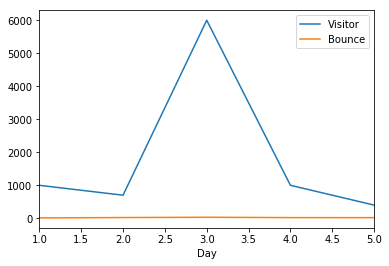

In [107]:
df1.plot()
plt.show()

### Changing the column headers

In [110]:
df1.rename(columns={"Visitor" : "Users"}, inplace = True)

In [111]:
df1

,Users,Bounce
Day,,
1,1000,12
2,700,23
3,6000,32
4,1000,21
5,400,20


### Concatenation

In [113]:
concat = pd.concat([h_df1, h_df2])

/home/kalinga/anaconda3/envs/ipykernel_py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [114]:
concat

,HPI,IND_GDP,Int,Popu
year,,,,
2001,80,50.0,2,NaN
2002,90,45.0,1,NaN
2003,70,45.0,2,NaN
2005,60,67.0,3,NaN
2005,80,NaN,2,500.0
2006,90,NaN,1,405.0
2007,701,NaN,2,458.0
2008,601,NaN,3,679.0


### Data Munging

In [118]:
yu_df = pd.read_csv("WB_YU.csv", index_col=0)

In [122]:
yu_df.columns

Index(['Country Code', '2010', '2011', '2012', '2013', '2014'], dtype='object')

In [131]:
yu_df

,Country Code,2010,2011,2012,2013,2014
Country Name,,,,,,
Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000
Argentina,ARG,19.500000,18.799999,18.400000,19.700001,21.299999
Armenia,ARM,38.299999,38.700001,35.000000,32.500000,35.099998
Australia,AUS,11.400000,11.400000,11.700000,12.200000,13.100000
Austria,AUT,8.800000,8.200000,8.700000,9.100000,9.200000


In [132]:
yu_df.to_html("unemployment.html")

### Analysis

In [133]:
style.use("fivethirtyeight")

In [134]:
yu_df1 = yu_df.head(5)

In [135]:
yu_df1

,Country Code,2010,2011,2012,2013,2014
Country Name,,,,,,
Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [136]:
yu_df1 = yu_df1.set_index(["Country Code"]) #removes the old index

In [137]:
yu_df1 

,2010,2011,2012,2013,2014
Country Code,,,,,
AFG,20.600000,20.900000,19.700001,21.100000,20.799999
AGO,10.800000,10.700000,10.700000,10.600000,10.500000
ALB,25.799999,27.000000,28.299999,28.700001,29.200001
ARB,25.022214,28.117516,29.113212,29.335306,29.704569
ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [138]:
sd = yu_df1.reindex(columns=["2010", "2011"])

In [139]:
sd

,2010,2011
Country Code,,
AFG,20.600000,20.900000
AGO,10.800000,10.700000
ALB,25.799999,27.000000
ARB,25.022214,28.117516
ARE,9.800000,9.800000


In [140]:
db = sd.diff(axis=1)

In [141]:
db

,2010,2011
Country Code,,
AFG,NaN,0.299999
AGO,NaN,-0.100000
ALB,NaN,1.200001
ARB,NaN,3.095302
ARE,NaN,0.000000


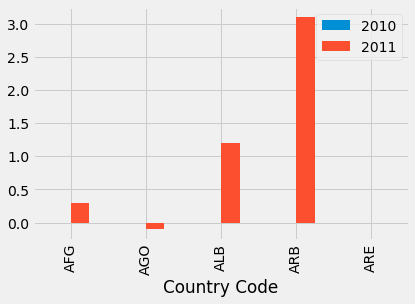

In [143]:
db.plot(kind="bar")
plt.show()

### Statistics

In [153]:
from statistics import mean
from statistics import median
from statistics import mode
from statistics import variance

In [148]:
mean([23,24,25,26])

24.5

In [149]:
median([23,24,25,26])

24.5

In [152]:
mode([23,23,24,25,26])

23

In [154]:
variance([23,23,24,25,26])

1.7

In [9]:
l = list(map(lambda x: x*x, [1,2,3]))

In [10]:
l

[1, 4, 9]

In [11]:
l1 = list(map(lambda x,y: x*y, [1,2,3], [3,4,5]))

In [12]:
l1

[3, 8, 15]

In [18]:
even = list(filter(lambda x: x%2 ==0, [2,56,8,7,9]))

In [19]:
print(even)

[2, 56, 8]
